<h2>Importing Libraries & Dataset</h2>

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
dataset = load_breast_cancer()
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["Target"] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<h2>EDA</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

<p>We have too many columns so we will use PCA to reduce them.</p>

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

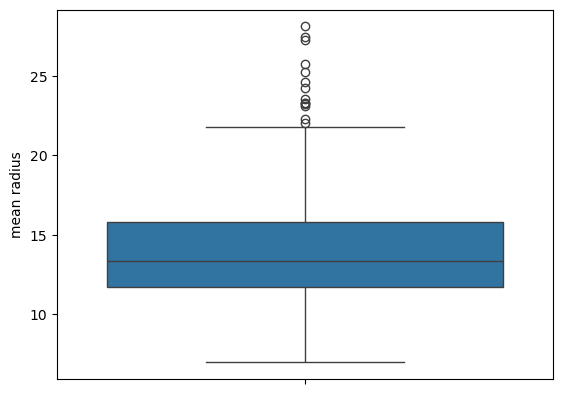

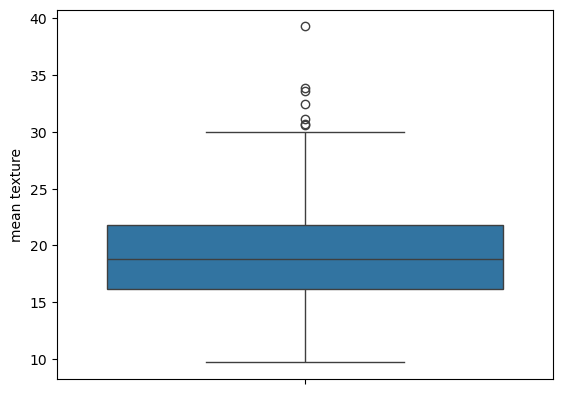

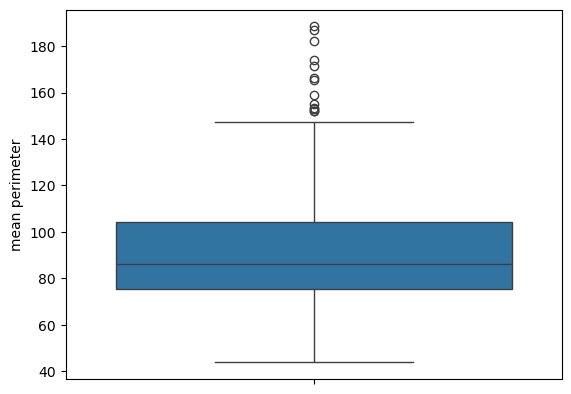

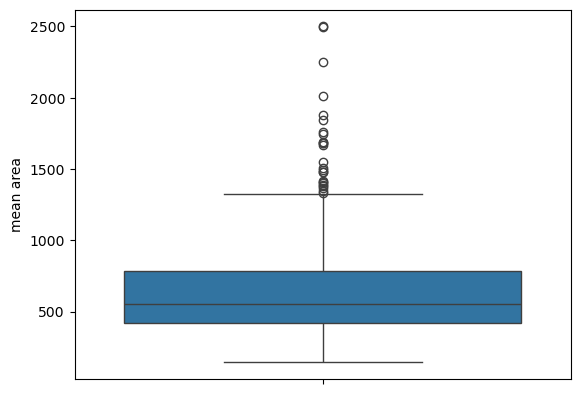

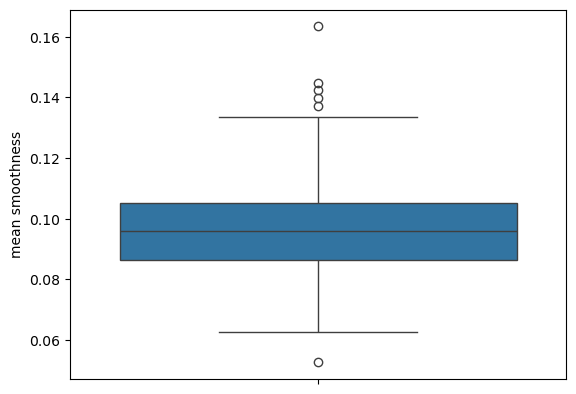

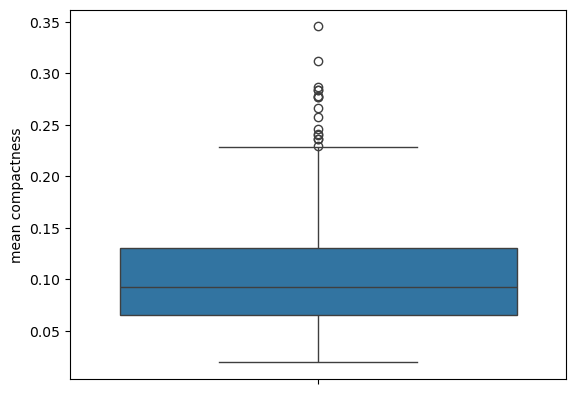

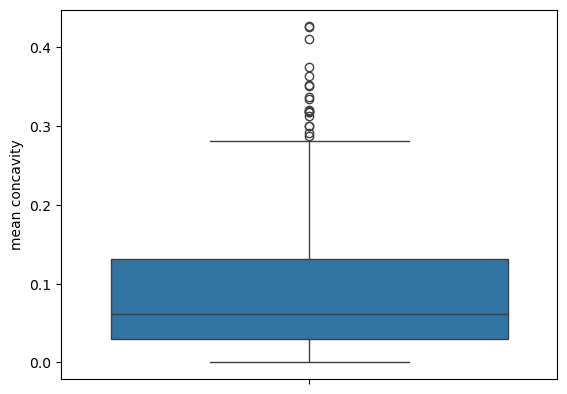

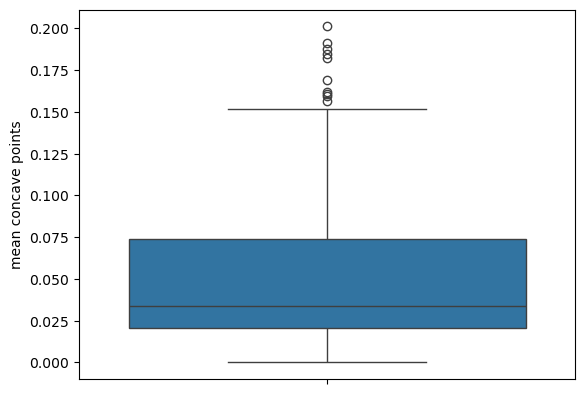

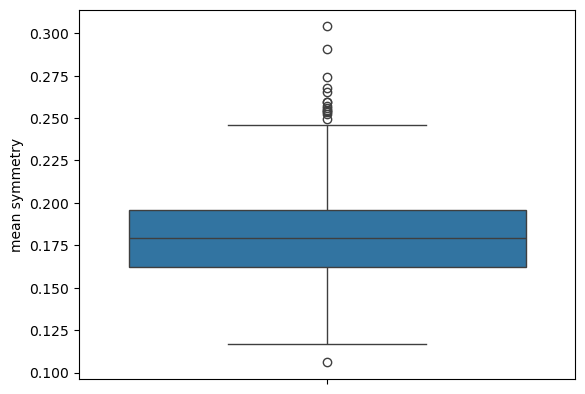

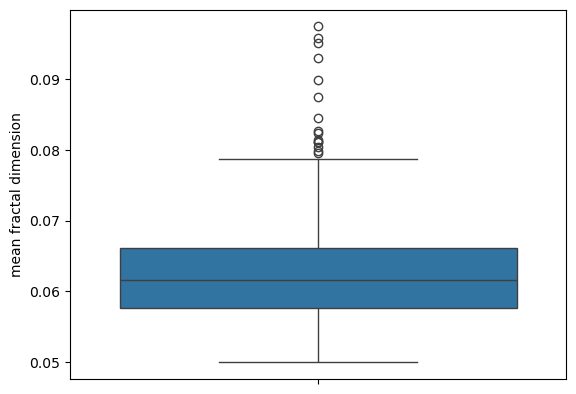

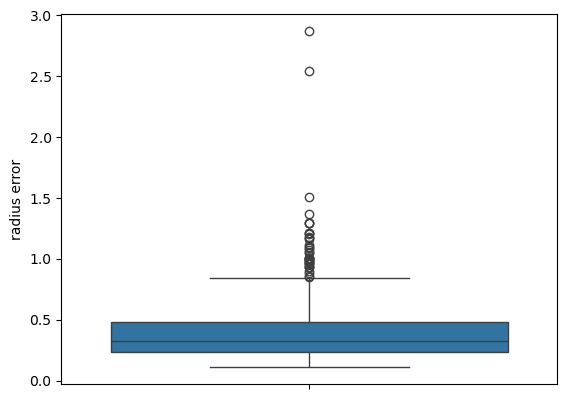

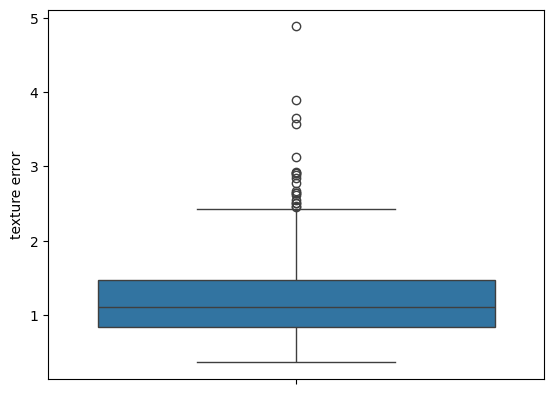

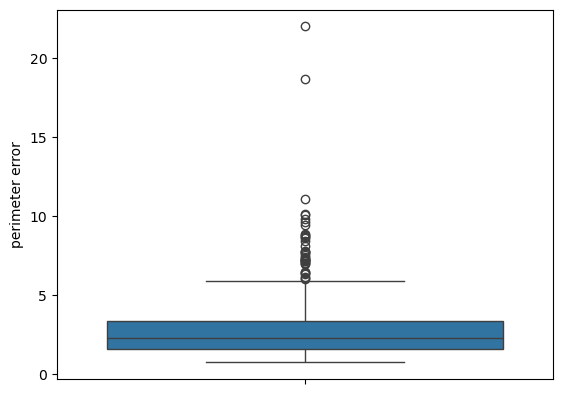

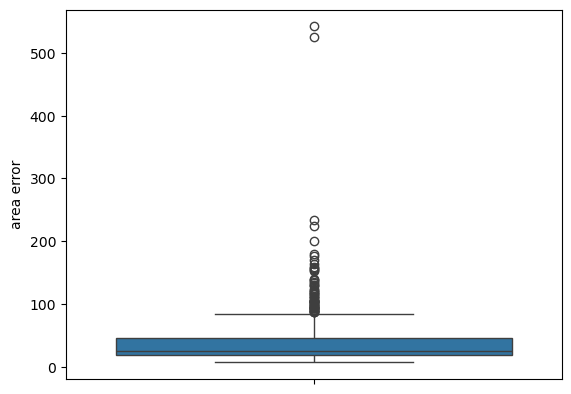

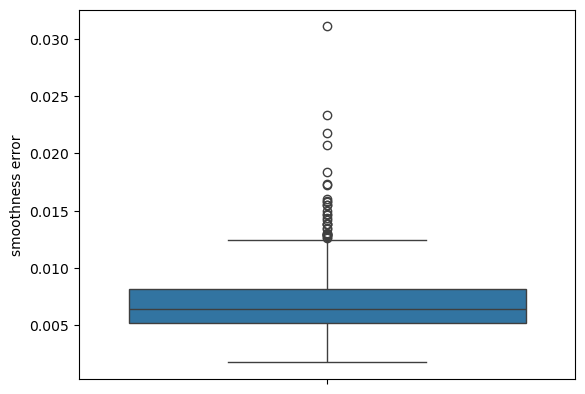

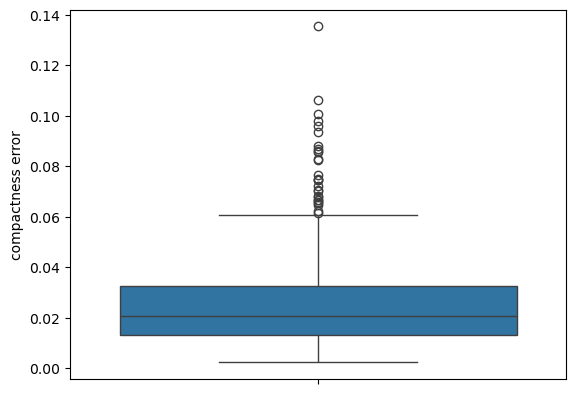

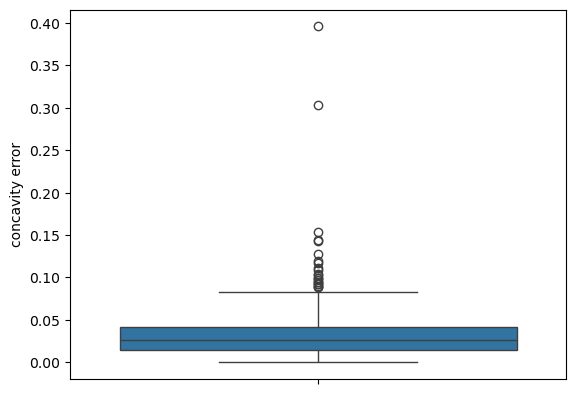

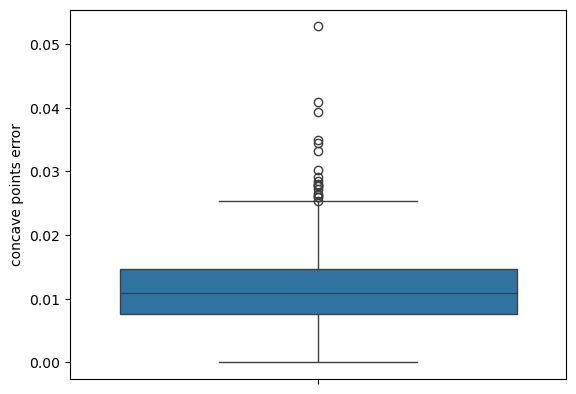

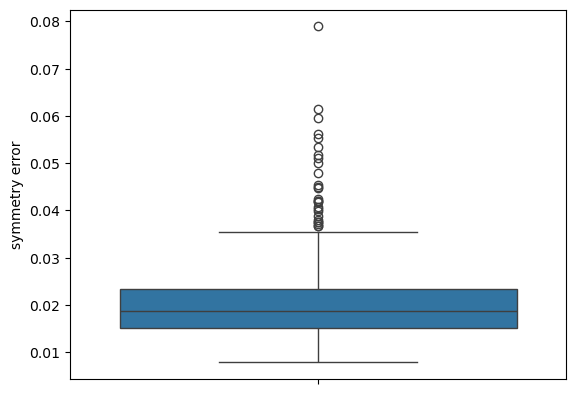

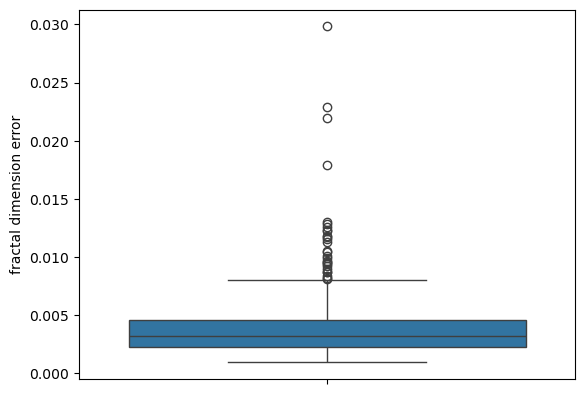

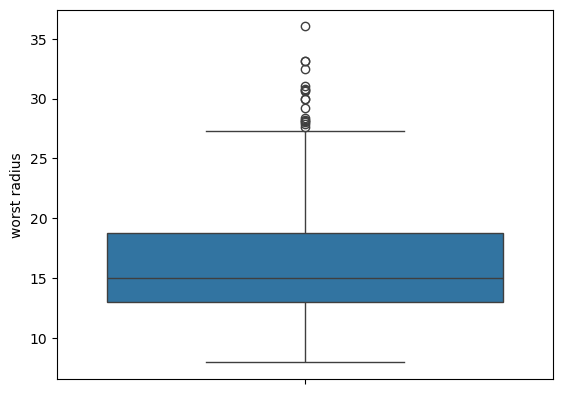

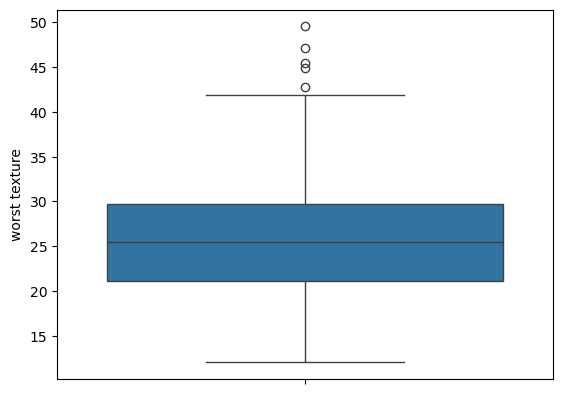

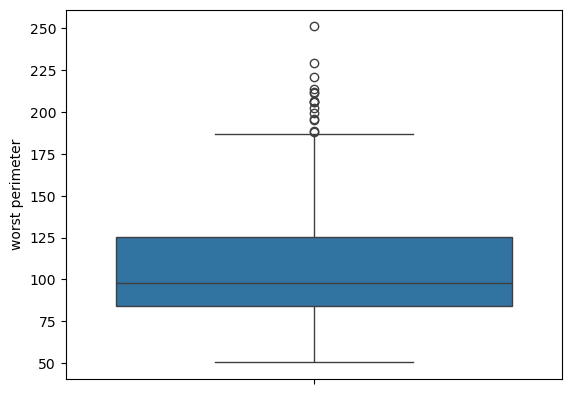

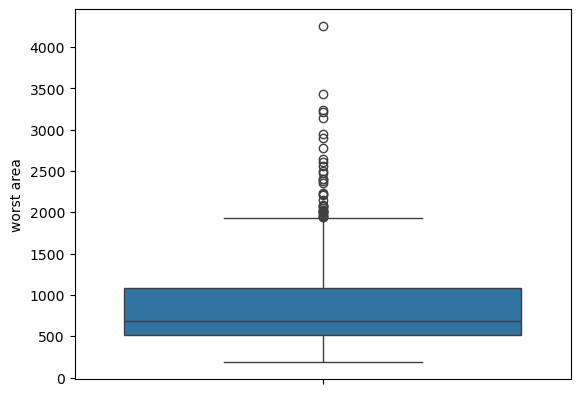

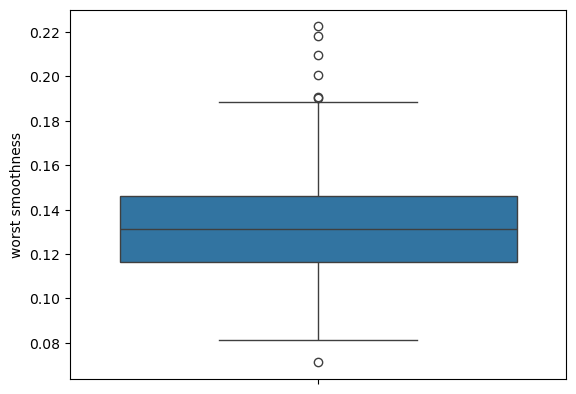

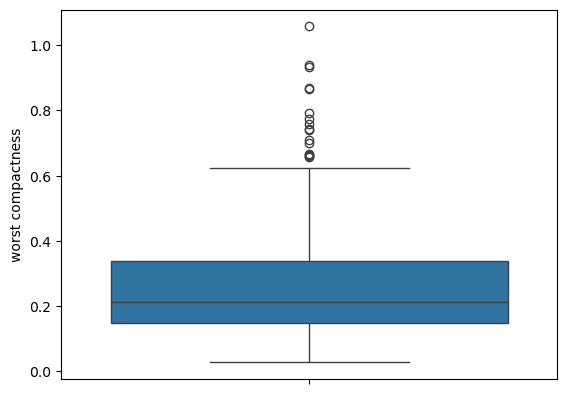

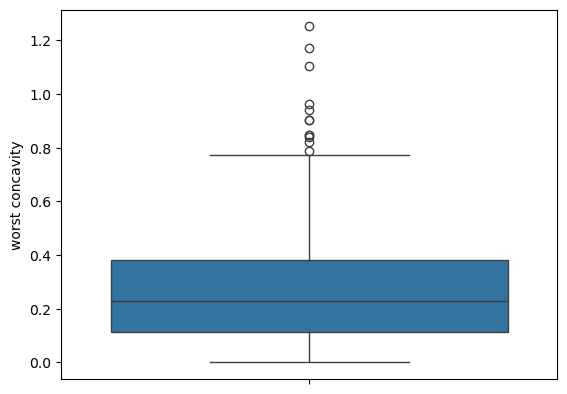

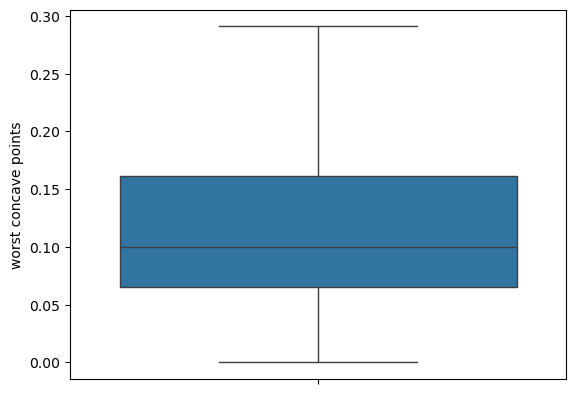

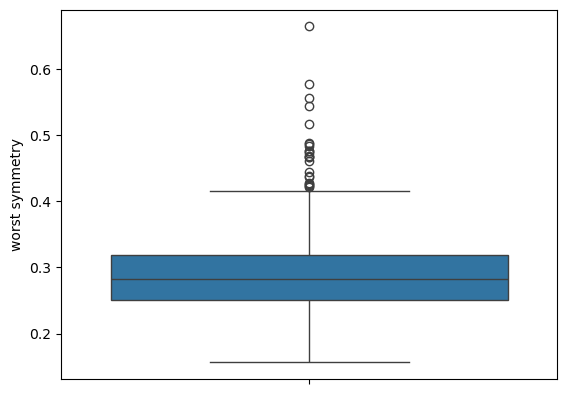

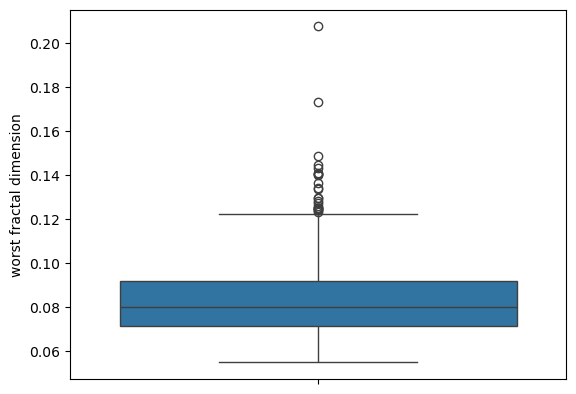

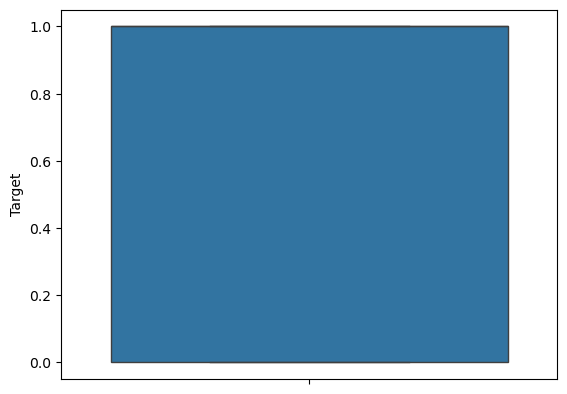

In [7]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

<p>Dataset has some outliers so we are going to use RobustScaler for it.</p>

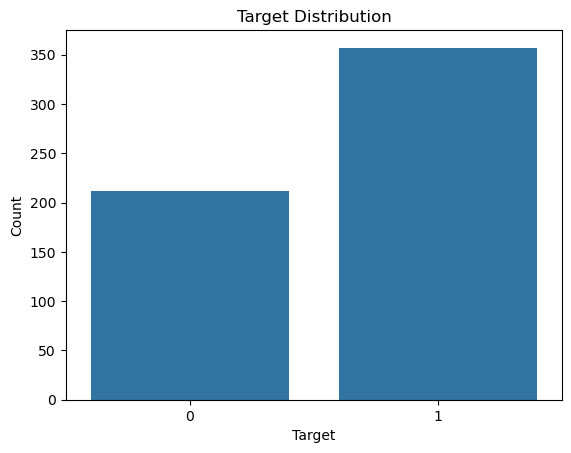

In [8]:
sns.countplot(x=df['Target'])
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

<p>Target is imbalanced so we are going to use SMOTE to balance the Target column.</p>

<h2>Pipeline and Model Comparison</h2>

In [9]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

columns = df.drop(columns=['Target']).columns.tolist()
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
preprocessing = ColumnTransformer([
    ("scaling",rs,columns)
])

pipeline = Pipeline([
    ("preprocessing",preprocessing), 
    ("smote",SMOTE(random_state=42)), 
    ('pca',PCA(n_components=0.90)), 
    ('model',lr)
])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   'texture error',
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',
                                                   'concavity error',
                                                   'concave points error',
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.9)),
                ('model', LogisticRegression())])

<h3>Dataset Splitting</h3>

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
X = df.drop(columns=['Target'])
Y = df.Target
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

<h3>Model Comparision</h3>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "LR": LogisticRegression(),
    "GaussianNB": GaussianNB(),
    "DTree": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier()
}

ACC = 0
NAME = ""

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessing), 
        ("smote", SMOTE(random_state=42)), 
        ("pca", PCA(n_components=0.90)), 
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    if acc > ACC:
        ACC = acc
        NAME = name
    print(f"Model: {name}")
    print("Train Accuracy:", pipeline.score(X_train, y_train) * 100)
    print("Test Accuracy:", pipeline.score(X_test, y_test) * 100)
    print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
    print("Classification Report:")
    
    print(classification_report(y_test, y_pred))
    print("--" * 20)
    
print(f"{NAME}: {ACC}")

Model: LR
Train Accuracy: 97.58241758241758
Test Accuracy: 98.24561403508771
Accuracy Score: 98.24561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

----------------------------------------
Model: GaussianNB
Train Accuracy: 93.62637362637362
Test Accuracy: 94.73684210526315
Accuracy Score: 94.73684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

-----------------------------

<h2>Checking Reliability of the Model</h2>

In [24]:
pipeline = Pipeline([
        ("preprocessing", preprocessing), 
        ("smote", SMOTE(random_state=42)), 
        ("pca", PCA(n_components=0.90)), 
        ("model", LogisticRegression())
    ])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
cv = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Train:", pipeline.score(X_train, y_train) * 100)
print("Test:", pipeline.score(X_test, y_test) * 100)
print("Prediction:", accuracy_score(y_test, y_pred) * 100)
print("CV:", cv)
print("CV Avg:", cv.mean()*100)

Train: 97.58241758241758
Test: 98.24561403508771
Prediction: 98.24561403508771
CV: [0.96703297 0.94505495 0.97802198 0.97802198 0.94505495]
CV Avg: 96.26373626373625


<h2>Applying GridSearchCV</h2>

In [15]:
param_grid = [
    {
        "model__penalty": ["l1"],
        "model__C": [0.0001, 0.001, 0.01, 0.1, 1],
        "model__solver": ["liblinear", "lbfgs", "saga"],
        "model__max_iter": [1, 10, 100, 1000],
    },
    {
        "model__penalty": ["l2"],
        "model__C": [0.0001, 0.001, 0.01, 0.1, 1],
        "model__solver": ["liblinear", "lbfgs", "saga"],
        "model__max_iter": [1, 10, 100, 1000],
    },
    {
        "model__penalty": ["elasticnet"],
        "model__C": [0.0001, 0.001, 0.01, 0.1, 1],
        "model__solver": ["liblinear", "lbfgs", "saga"],
        "model__max_iter": [1, 10, 100, 1000],
    },
]
gridcv = GridSearchCV(pipeline, param_grid, cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         ['mean '
                                                                          'radius',
                                                                          'mean '
                                                                          'texture',
                                                                          'mean '
                                                                          'perimeter',
                                                                          'mean '
                                                                          'area',
                                                                          'mean '
                                                                          'smoothness',
                                                                          'mean '
                                                                          'compactness',
                                                                          'mean '
                                                                          'concavity',
                                                                          'mean '
                                                                          'concave '
                                                                          'points',
                                                                          'mean '
                                                                          'symmetry',
                                                                          'mean '
                                                                          'fractal '
                                                                          'dimension',
                                                                          'radius '
                                                                          'error',
                                                                          'texture '
                                                                          'error',
                                                                          'perimeter...
                          'model__penalty': ['l1'],
                          'model__solver': ['liblinear', 'lbfgs', 'saga']},
                         {'model__C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'model__max_iter': [1, 10, 100, 1000],
                          'model__penalty': ['l2'],
                          'model__solver': ['liblinear', 'lbfgs', 'saga']},
                         {'model__C': [0.0001, 0.001, 0.01, 0.1, 1],
                          'model__max_iter': [1, 10, 100, 1000],
                          'model__penalty': ['elasticnet'],
                          'model__solver': ['liblinear', 'lbfgs', 'saga']}])

In [16]:
gridcv.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   'texture error',
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',...
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.9)),
                ('model',
                 LogisticRegression(C=1, max_iter=10, penalty='l1',
                                    solver='saga'))])

In [17]:
gridcv.best_score_

0.9670329670329672

<h2>Creating final model</h2>

In [18]:
pipeline = Pipeline([
        ("preprocessing", preprocessing), 
        ("smote", SMOTE(random_state=42)), 
        ("pca", PCA(n_components=0.90)), 
        ("model", LogisticRegression(C=1, max_iter=10, penalty='l1', solver='saga'))
    ])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   'texture error',
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',...
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.9)),
                ('model',
                 LogisticRegression(C=1, max_iter=10, penalty='l1',
                                    solver='saga'))])

In [19]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   'texture error',
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',...
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.9)),
                ('model',
                 LogisticRegression(C=1, max_iter=10, penalty='l1',
                                    solver='saga'))])

In [20]:
cv = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Train:", pipeline.score(X_train, y_train) * 100)
print("Test:", pipeline.score(X_test, y_test) * 100)
print("Prediction:", accuracy_score(y_test, y_pred) * 100)
print("CV:", cv)
print("CV Avg:", cv.mean() * 100)

Train: 96.48351648351648
Test: 98.24561403508771
Prediction: 98.24561403508771
CV: [0.98901099 0.96703297 0.97802198 0.95604396 0.93406593]
CV Avg: 96.4835164835165


<h2>Evaluation Model</h2>

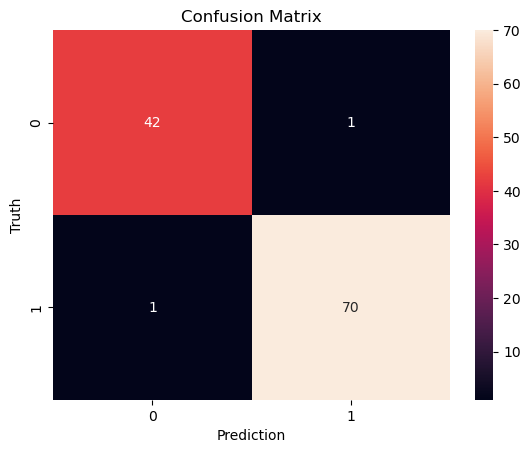

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [22]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

